In [14]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
from functions import *
import scib_metrics
from lightning.pytorch.callbacks import ModelCheckpoint
from SCVIModelCheckpoint import SCVIModelCheckpoint 
import copy
%matplotlib inline

In [3]:
adata = anndata.read_h5ad(filename="data/adataLung4.h5ad")
scvi.model.SCVI.setup_anndata(adata, layer="counts")

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


In [4]:
adata

AnnData object with n_obs × n_vars = 32472 × 4000
    obs: 'dataset', 'location', 'nGene', 'nUMI', 'patientGroup', 'percent.mito', 'protocol', 'sanger_type', 'size_factors', 'sampling_method', 'batch', 'cell_type', 'donor', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [11]:
betas = [0, 1, 5, 10]

In [12]:
vaeSD = scvi.model.SCVI(adata, prior_distribution="sdnormal")
vaeMG = scvi.model.SCVI(adata, prior_distribution="mixofgaus")
vaeVP = scvi.model.SCVI(adata, prior_distribution="vamp")
vaeNF = scvi.model.SCVI(adata, prior_distribution="normalflow",prior_kwargs={"num_layers":8})

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [01:18<00:00,  1.55s/it, v_num=1, train_loss_step=891, train_loss_epoch=876]    

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [01:18<00:00,  1.58s/it, v_num=1, train_loss_step=891, train_loss_epoch=876]
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [01:18<00:00,  1.59s/it, v_num=1, train_loss_step=972, train_loss_epoch=898]      

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [01:18<00:00,  1.57s/it, v_num=1, train_loss_step=972, train_loss_epoch=898]
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [01:19<00:00,  1.54s/it, v_num=1, train_loss_step=943, train_loss_epoch=940]      

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [01:19<00:00,  1.58s/it, v_num=1, train_loss_step=943, train_loss_epoch=940]
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|██████████| 50/50 [01:17<00:00,  1.59s/it, v_num=1, train_loss_step=1.02e+3, train_loss_epoch=968]

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [01:17<00:00,  1.54s/it, v_num=1, train_loss_step=1.02e+3, train_loss_epoch=968]
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


Embeddings: 100%|██████████| 4/4 [02:01<00:00, 30.43s/it]


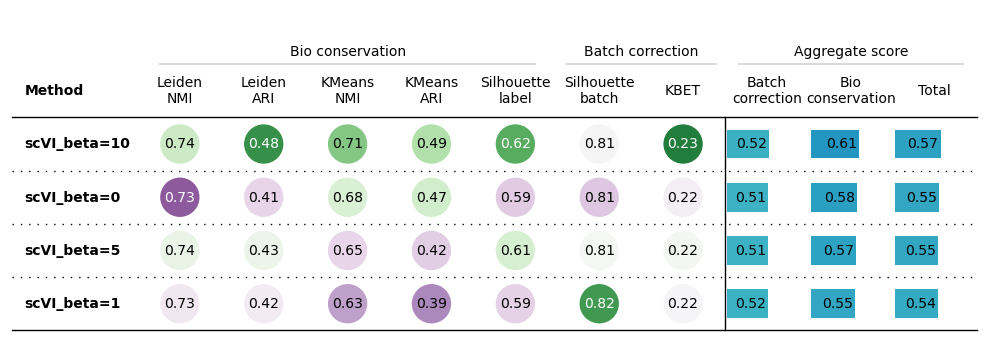

In [15]:
adataSD, keysSD = betasTraining(vaeSD, adata, betas, 200, 300)
bmSD = runBenchmark(adataSD, keysSD, nmi_ari_cluster_labels_leiden=True, nmi_ari_cluster_labels_kmeans = True, silhouette_label=True, silhouette_batch =True, kbet_per_label=True)

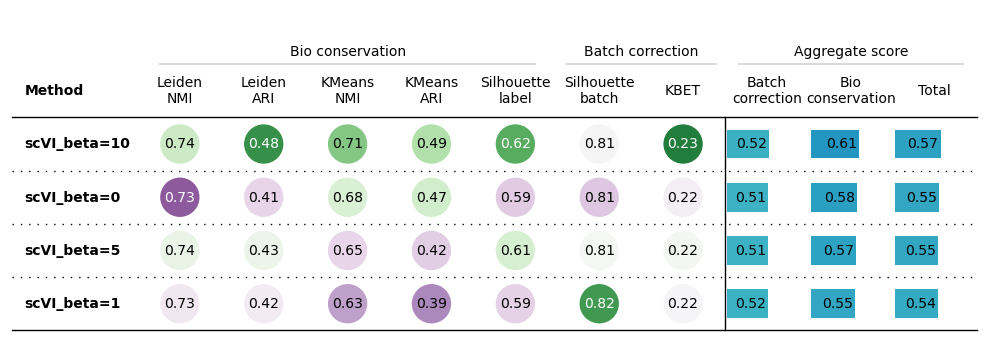

In [17]:
bmSD.plot_results_table(min_max_scale=False)

In [ ]:
adataMG, keysMG = betasTraining(vaeMG, adata, betas, 200, 300)
bmMG = runBenchmark(adataMG, keysMG, nmi_ari_cluster_labels_leiden=True, nmi_ari_cluster_labels_kmeans = True, silhouette_label=True, silhouette_batch =True, kbet_per_label=True)

In [ ]:
bmMG.plot_results_table(min_max_scale=False)

In [ ]:
adataVP, keysVP = betasTraining(vaeVP, adata, betas, 200, 300)
bmVP = runBenchmark(adataVP, keysVP, nmi_ari_cluster_labels_leiden=True, nmi_ari_cluster_labels_kmeans = True, silhouette_label=True, silhouette_batch =True, kbet_per_label=True)

In [ ]:
bmVP.plot_results_table(min_max_scale=False)

In [ ]:
adataNF, keysNF = betasTraining(vaeNF, adata, betas, 200, 300)
bmNF = runBenchmark(adataNF, keysNF, nmi_ari_cluster_labels_leiden=True, nmi_ari_cluster_labels_kmeans = True, silhouette_label=True, silhouette_batch =True, kbet_per_label=True)

In [ ]:
bmNF.plot_results_table(min_max_scale=False)